## Apply Binning

### Load datasets

This notebook will download the datasets from the Kaggle repository and place them in /home/.cache.

In [106]:
import sys
sys.path.append('../src/utils')

from kaggle_manager import KaggleManager

yelp_academic_dataset_business_path = KaggleManager.get_file("yelp-dataset/yelp-dataset/versions/4", "yelp_academic_dataset_business.json")
biz_df = KaggleManager.load_json_df(yelp_academic_dataset_business_path)

Starting download of: yelp_academic_dataset_business.json (latest)...
Normal file detected (no decompression required).
Ready to use at: C:\Users\luis.bolanoss\.cache\kagglehub\datasets\yelp-dataset\yelp-dataset\versions\4\yelp_academic_dataset_business.json
Loading DataFrame from: yelp_academic_dataset_business.json...


### Show Review Count statistics 

In [107]:
biz_df['review_count'].describe()

count    150346.000000
mean         44.866561
std         121.120136
min           5.000000
25%           8.000000
50%          15.000000
75%          37.000000
max        7568.000000
Name: review_count, dtype: float64

### Checking current Distribution (A heavy right tail distribution)

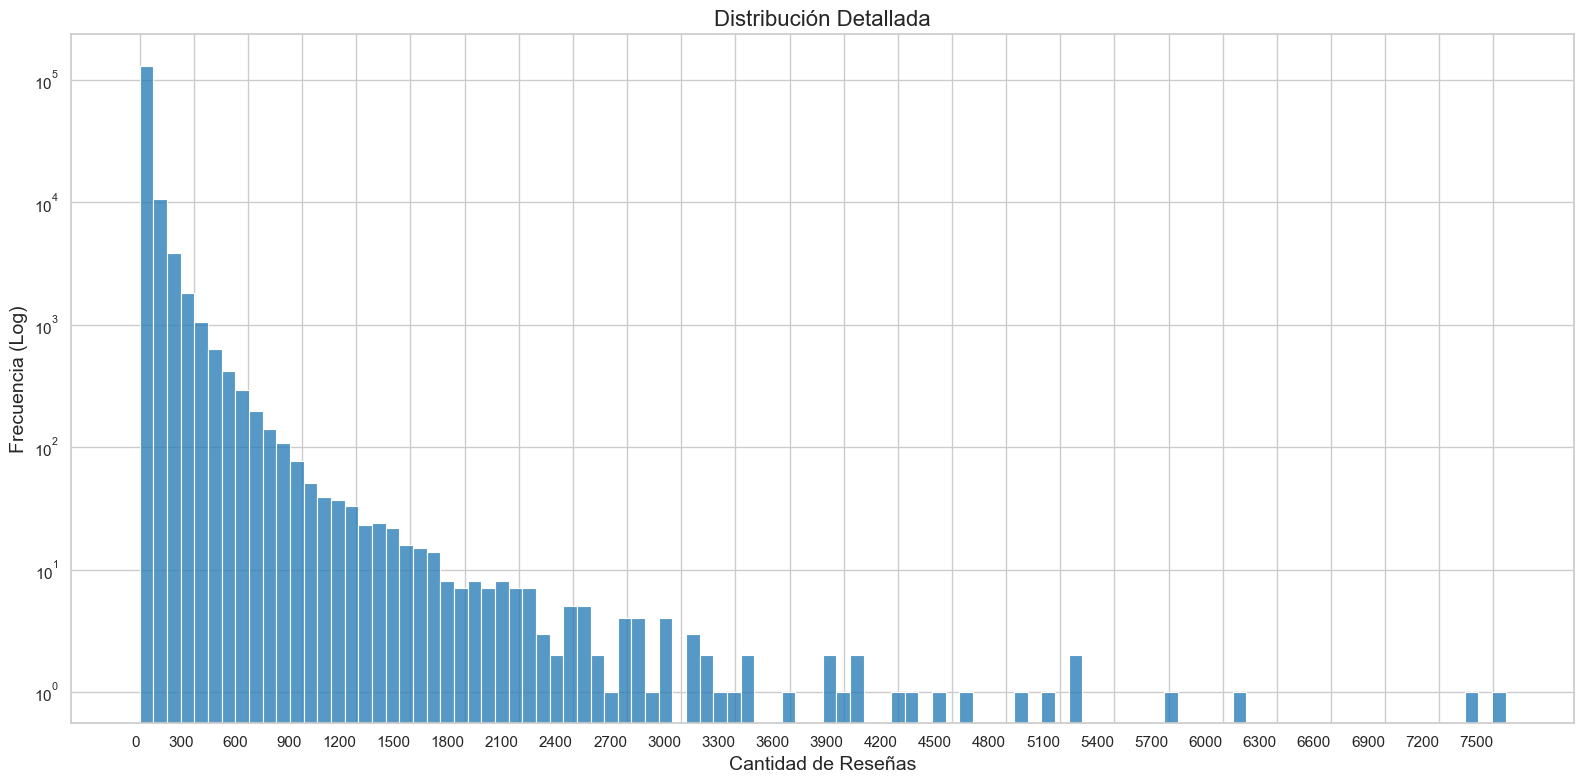

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

max_review_count = biz_df['review_count'].max()
bins = 100
x_ticks = np.arange(0, max_review_count, 300)

# 1. AGRANDAR LA IMAGEN: (16 de ancho x 8 de alto)
# Esto da espacio físico para que quepan todos los números.
plt.figure(figsize=(16, 8))
sns.set_style('whitegrid')

# Graficamos con Zoom entre 0 y 1000
ax = sns.histplot(
    data=biz_df, 
    x='review_count', 
    binrange=(0, max_review_count), 
    bins=bins, 
    color='#1f77b4'
)

# Escala logarítmica en Y
ax.set_yscale('log')

# --- TUS MEJORAS PARA EL EJE X ---

# 2. COLOCAR INTERVALOS: Vamos de 0 a 1000 en pasos de 50.
# Usamos 1050 como límite final para asegurarnos de que el número 1000 aparezca.
ax.set_xticks(x_ticks)

# 3. ROTACIÓN DIAGONAL: Rotamos 45 grados.
# 'ha="right"' alinea el texto a la derecha para que la punta apunte a la rayita exacta.
ax.set_xticklabels(x_ticks, rotation=0, ha='right', fontsize=11)

# Etiquetas y Título
ax.set_xlabel('Cantidad de Reseñas', fontsize=14)
ax.set_ylabel('Frecuencia (Log)', fontsize=14)
plt.title('Distribución Detallada', fontsize=16)

# Importante: Evita que los textos rotados se corten al guardar o mostrar
plt.tight_layout()

plt.show()


## Checking Quantiles

### Uses of Quantiles

Quantiles are primarily used to:

- **Understand Data Distribution**
  They help visualize how data is spread out and identify if the distribution is skewed (leaning to one side) or symmetric, without relying on the mean or standard deviation.

- **Detect Outliers**
  By calculating the Interquartile Range (IQR = Q3 - Q1), you can mathematically identify extreme values. Data points falling significantly below Q1 or above Q3 are often flagged as anomalies.

- **Compare Groups**
  They allow for the robust comparison of different datasets (e.g., salaries in different countries) by comparing medians and spreads rather than averages, which can be distorted by extreme values.

- **Ranking and Benchmarking**
  They are standard tools for ranking performance relative to a population (e.g., standardized test scores in the 99th percentile or income brackets in the top decile).

How calculate quartiles:

- Sort the data (Ascending)
- p_index = k(n + 1) / n

Where:
- **k**: The quartile number (1, 2, or 3)
- **n**: Total number of observations

Based on `p_index`:

- **Case A: p_index is an Integer**
  - The Quartile is the value found exactly at that position.
  - $Q_k = Data[p\_index]$

- **Case B: p_index is a Decimal**
  - Let **i** be the integer part of `p_index`.
  - Let **j** be the next position (**i + 1**).
  - The Quartile is the average of the values at these two positions.
  - $Q_k = \frac{Data[i] + Data[j]}{2}$

C:\Users\luis.bolanoss\AppData\Local\Temp\ipykernel_12976\4267029507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\luis.bolanoss\AppData\Local\Temp\ipykernel_12976\4267029507.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(etiquetas, fontsize=12)


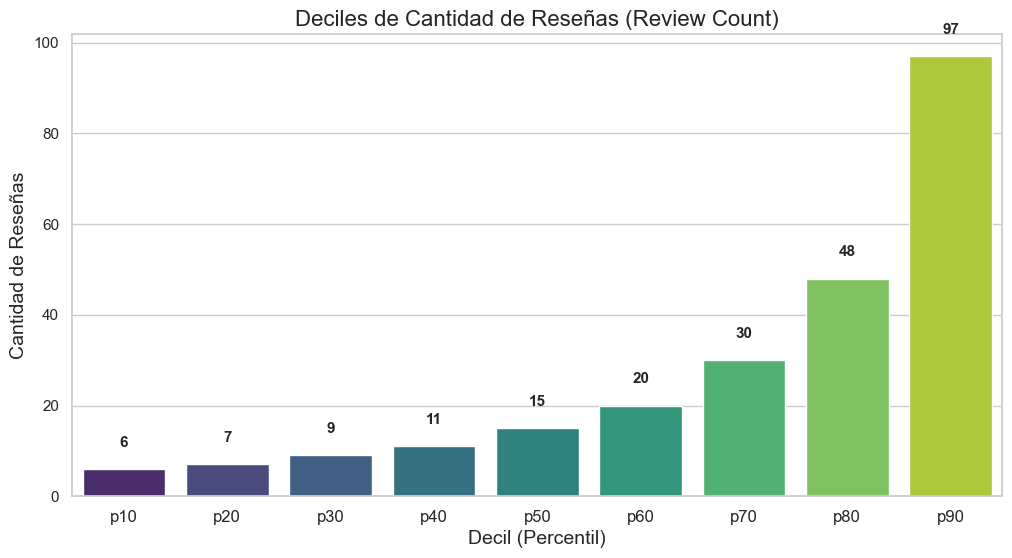

0.1     6.0
0.2     7.0
0.3     9.0
0.4    11.0
0.5    15.0
0.6    20.0
0.7    30.0
0.8    48.0
0.9    97.0
Name: review_count, dtype: float64

In [109]:
# 
review_count_deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

# Configuración
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras
ax = sns.barplot(
    x=review_count_deciles.index, 
    y=review_count_deciles.values, 
    palette="viridis"
)

# Optimizaciones Visuales
plt.title('Deciles de Cantidad de Reseñas (Review Count)', fontsize=16)
plt.xlabel('Decil (Percentil)', fontsize=14)
plt.ylabel('Cantidad de Reseñas', fontsize=14)

# Formatear eje X para que diga "10%", "20%" en vez de 0.1, 0.2
# Usamos comprensión de listas para crear etiquetas bonitas
etiquetas = [f'p{int(x*100)}' for x in review_count_deciles.index]
ax.set_xticklabels(etiquetas, fontsize=12)

# AGREGAR VALORES ENCIMA DE LAS BARRAS
# Esto es clave para que la gráfica sea útil
for i, valor in enumerate(review_count_deciles.values):
    ax.text(
        i,              # Posición X (índice de la barra)
        valor + 5,      # Posición Y (valor + un poquito hacia arriba)
        f'{int(valor)}',# Texto a mostrar (convertido a entero)
        ha='center',    # Centrado horizontalmente
        fontweight='bold',
        fontsize=11
    )

plt.show()

review_count_deciles

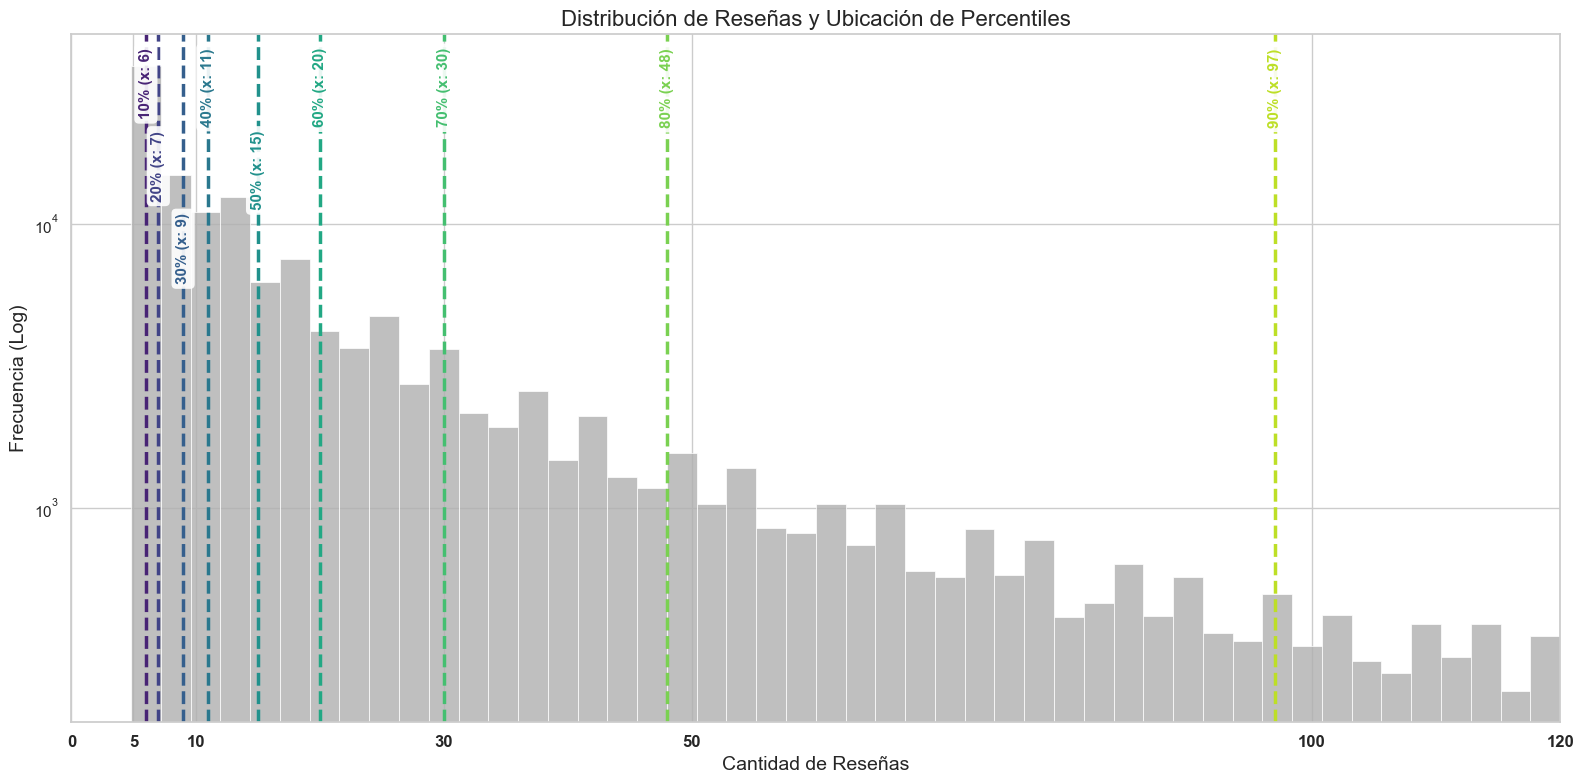

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns


review_count_deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

max_review_count = 120
bins = 50 
x_ticks = [0, 5, 10, 30, 50, 100, 120] 

plt.figure(figsize=(16, 8))
sns.set_style('whitegrid')

ax = sns.histplot(
    data=biz_df,
    x='review_count',
    binrange=(0, max_review_count),
    bins=bins,
    color='#B0B0B0',
    edgecolor='white',
    linewidth=0.5,
    alpha=0.8
)

ax.set_yscale('log')
ax.set_xlim(0, max_review_count) 
ax.margins(x=0) 

colors = sns.color_palette("viridis", len(review_count_deciles))
trans = ax.get_xaxis_transform()

for i, ((percentil, valor), color) in enumerate(zip(review_count_deciles.items(), colors)):
    if valor <= max_review_count:
        plt.axvline(valor, color=color, linestyle='--', linewidth=2.5, alpha=1.0)

        # Lógica de Zig-Zag para etiquetas
        if i < 5:
            y_pos = 0.98 - (i % 3) * 0.12 
        else:
            y_pos = 0.98

        plt.text(
            valor,          
            y_pos,          
            f'{int(percentil*100)}% (x: {int(valor)})',
            transform=trans, 
            rotation=90,
            color=color,
            fontweight='bold',
            ha='center',    
            va='top',       
            fontsize=11,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.9)
        )

# --- 4. MEJORAS PARA EL EJE X ---
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation=0, ha='center', fontsize=12, fontweight='bold')

ax.set_xlabel('Cantidad de Reseñas', fontsize=14)
ax.set_ylabel('Frecuencia (Log)', fontsize=14)
plt.title('Distribución de Reseñas y Ubicación de Percentiles', fontsize=16)

plt.tight_layout()
plt.show()